# Datenanalyse Part II

### Es stehen zwei CSV Datensets zur Verfügung:

#### CSV "persons_killed_on_motorways_eu.csv" enthält die Anzahl der getöteten Personen in Autobahnunfällen aller EU Länder
#### CSV "road_accidents_eu.csv" enthält die Anzahl der Verkehrsunfälle aller EU Länder

In [1]:
import pandas as pd

In [2]:
# Personen, die in Autobahnunfällen getötet wurden
persons_killed_data = pd.read_csv('data/persons_killed_on_motorways_eu.csv')

# Verkehrsunfälle
accidents_data = pd.read_csv('data/road_accidents_eu.csv')

In [3]:
# Struktur untersuchen

# Erste Zeilen der Daten anzeigen
print(persons_killed_data.head())

# Informationen über die Spalten und den Datentyp
print(persons_killed_data.info())

# Erste Zeilen der Daten anzeigen
print(accidents_data.head())

# Informationen über die Spalten und den Datentyp
print(accidents_data.info())

                    DATAFLOW        LAST UPDATE freq unit tra_infr geo  \
0  ESTAT:TRAN_SF_ROADRO(1.0)  20/06/23 11:00:00    A   NR     MWAY  AT   
1  ESTAT:TRAN_SF_ROADRO(1.0)  20/06/23 11:00:00    A   NR     MWAY  AT   
2  ESTAT:TRAN_SF_ROADRO(1.0)  20/06/23 11:00:00    A   NR     MWAY  AT   
3  ESTAT:TRAN_SF_ROADRO(1.0)  20/06/23 11:00:00    A   NR     MWAY  AT   
4  ESTAT:TRAN_SF_ROADRO(1.0)  20/06/23 11:00:00    A   NR     MWAY  AT   

   TIME_PERIOD  OBS_VALUE OBS_FLAG  
0         2012         50      NaN  
1         2013         31      NaN  
2         2014         36      NaN  
3         2015         41      NaN  
4         2016         34      NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DATAFLOW     254 non-null    object
 1   LAST UPDATE  254 non-null    object
 2   freq         254 non-null    object
 3   unit         254 no

In [4]:
# Überflüssige Spalten entfernen

persons_killed_data = persons_killed_data.drop(['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'tra_infr', 'OBS_FLAG'], axis=1)
accidents_data = accidents_data.drop(['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'OBS_FLAG'], axis=1)

print(persons_killed_data)
print(accidents_data)



    geo  TIME_PERIOD  OBS_VALUE
0    AT         2012         50
1    AT         2013         31
2    AT         2014         36
3    AT         2015         41
4    AT         2016         34
..   ..          ...        ...
249  UK         2014         81
250  UK         2015         93
251  UK         2016         91
252  UK         2017         82
253  UK         2018         99

[254 rows x 3 columns]
    geo  TIME_PERIOD  OBS_VALUE
0    AT         2013      38502
1    AT         2014      37957
2    AT         2015      37960
3    AT         2016      38466
4    AT         2017      37402
..   ..          ...        ...
272  SK         2017       5330
273  SK         2018       5335
274  SK         2019       5105
275  SK         2020       4302
276  SK         2021          0

[277 rows x 3 columns]


In [5]:
# DataFrames zusammenführen
merged_data = pd.merge(persons_killed_data, accidents_data, on=['geo', 'TIME_PERIOD'])

# Ergebnis anzeigen
print(merged_data.head())

  geo  TIME_PERIOD  OBS_VALUE_x  OBS_VALUE_y
0  AT         2013           31        38502
1  AT         2014           36        37957
2  AT         2015           41        37960
3  AT         2016           34        38466
4  AT         2017           45        37402


In [6]:
# Spalten umbenennen
merged_data = merged_data.rename(columns={'OBS_VALUE_x': 'killed_persons', 'OBS_VALUE_y': 'accidents'})

# Ergebnis anzeigen
print(merged_data.head())


  geo  TIME_PERIOD  killed_persons  accidents
0  AT         2013              31      38502
1  AT         2014              36      37957
2  AT         2015              41      37960
3  AT         2016              34      38466
4  AT         2017              45      37402


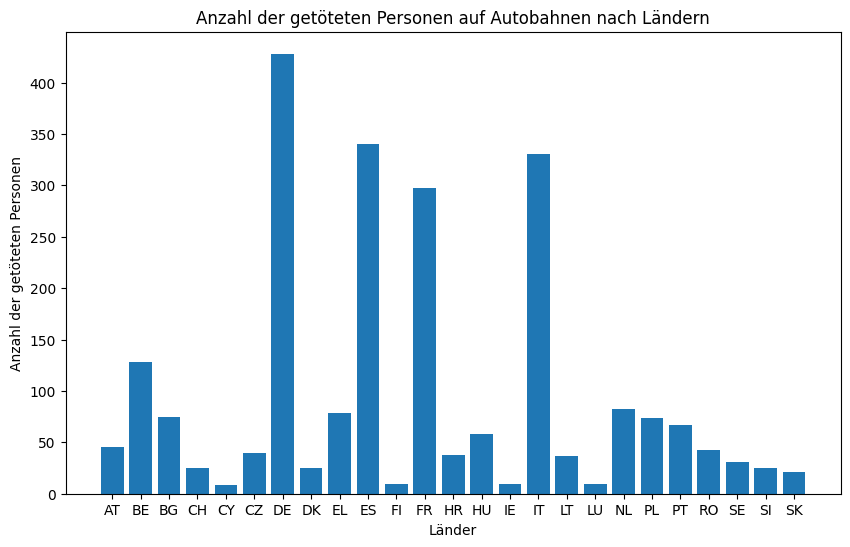

In [7]:
import matplotlib.pyplot as plt

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
plt.bar(merged_data['geo'], merged_data['killed_persons'])

# Achsentitel und Diagrammtitel hinzufügen
plt.xlabel('Länder')
plt.ylabel('Anzahl der getöteten Personen')
plt.title('Anzahl der getöteten Personen auf Autobahnen nach Ländern')

# Diagramm anzeigen
plt.show()


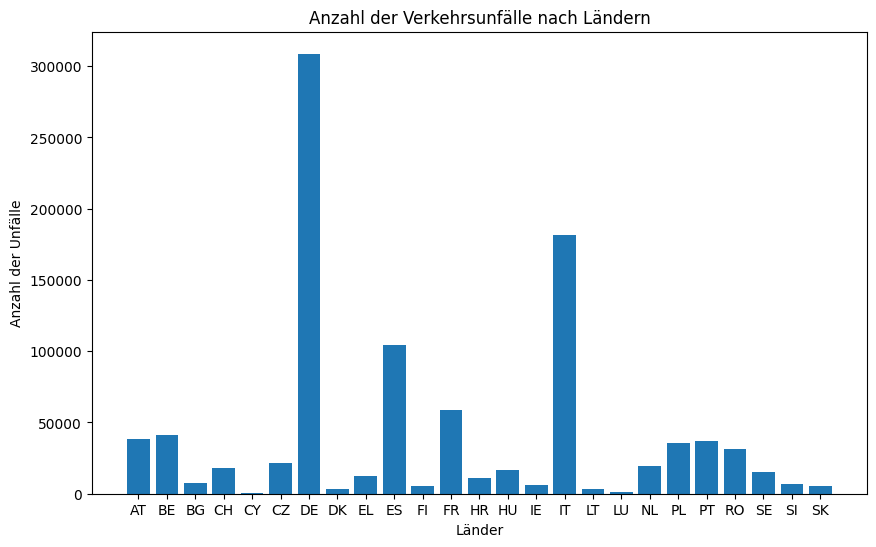

In [8]:
import matplotlib.pyplot as plt

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
plt.bar(merged_data['geo'], merged_data['accidents'])

# Achsentitel und Diagrammtitel hinzufügen
plt.xlabel('Länder')
plt.ylabel('Anzahl der Unfälle')
plt.title('Anzahl der Verkehrsunfälle nach Ländern')

# Diagramm anzeigen
plt.show()


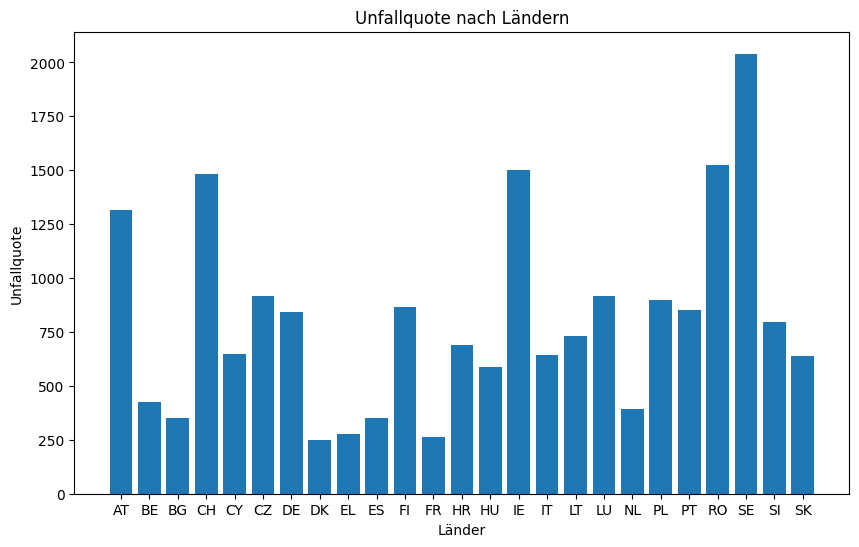

In [17]:

# Unfallquote berechnen (Unfälle pro getötete Person)
merged_data['accident_rate'] = merged_data['accidents'] / merged_data['killed_persons']

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
plt.bar(merged_data['geo'], merged_data['accident_rate'])

# Achsentitel und Diagrammtitel hinzufügen
plt.xlabel('Länder')
plt.ylabel('Unfallquote')
plt.title('Unfallquote nach Ländern')

# Diagramm anzeigen
plt.show()


## Schlussfolgerung

Eine Begrenzung der Geschwindigkeit auf deutschen Autobahnen würde tatsächlich Sinn ergeben, da aus dem Vergleich der Statistiken bezüglich der Anzahl der Verkehrsunfälle und der Anzahl der getöteten Personen klar ersichtlich ist, dass diese in Ländern mit Begrenzung deutlich niedriger ausfällt.
